In [ ]:
                                                 PYTHON PROJECT : RESTAURANT DATASET LEVEL 1 

In [ ]:
Objective: Gain foundational skills in data exploration, descriptive analysis, and some insights for a restaurant dataset.

In [ ]:
Tasks: Explore data address missing values,perform data conversions,identify top cuisines,City Analysis,
Price Range Distribution,Online delivery.


In [ ]:
Significance: Use of python and its libraries for the restaurant data-driven decision-making.

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('Restaurant.csv')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
LEVEL 1 : TASK 1 
# Task: Top Cuisines
# Determine the top three most common cuisines in the dataset.


In [7]:
# Drop rows with NaN in 'Cuisines' column
df = df.dropna(subset=['Cuisines'])

# Split the 'Cuisines' column entries into individual cuisines
cuisines_list = df['Cuisines'].str.split(', ')

# Flatten the list and count the occurrences of each cuisine
cuisine_counts = Counter([cuisine for sublist in cuisines_list for cuisine in sublist])

# Get the top three most common cuisines
top_three_cuisines = cuisine_counts.most_common(3)

top_three_cuisines


[('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]

In [ ]:
# Calculate the percentage of restaurants that serve each of the top cuisines.


In [9]:
# Total number of restaurants
total_restaurants = len(df)

# Count the number of restaurants serving each of the top cuisines
top_cuisines = [cuisine for cuisine, count in top_three_cuisines]
cuisine_restaurant_counts = {cuisine: df['Cuisines'].str.contains(cuisine).sum() for cuisine in top_cuisines}

# Calculate the percentage for each cuisine
cuisine_percentages = {cuisine: (count / total_restaurants) * 100 for cuisine, count in cuisine_restaurant_counts.items()}

cuisine_percentages


{'North Indian': 41.50073359882624,
 'Chinese': 28.641794173129327,
 'Fast Food': 20.823726682037307}

In [ ]:
LEVEL 1 : TASK 2
# Task: City Analysis


In [ ]:
# Identify the city with the highest number of restaurants in the dataset.

In [10]:
# Count the number of restaurants in each city
city_counts = df['City'].value_counts()

# Identify the city with the highest number of restaurants
most_restaurants_city = city_counts.idxmax()
highest_count = city_counts.max()

most_restaurants_city, highest_count


('New Delhi', 5473)

In [ ]:
# Calculate the average rating for restaurants in each city.

In [11]:
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

average_ratings_by_city


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64

In [ ]:
# Determine the city with the highest average rating.

In [12]:
highest_average_rating_city = average_ratings_by_city.idxmax()
highest_average_rating = average_ratings_by_city.max()

highest_average_rating_city, highest_average_rating


('Inner City', 4.9)

In [ ]:
LEVEL 1 : TASK 3
 # Task: Price Range Distribution

In [ ]:
# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurant.


In [13]:
import matplotlib.pyplot as plt

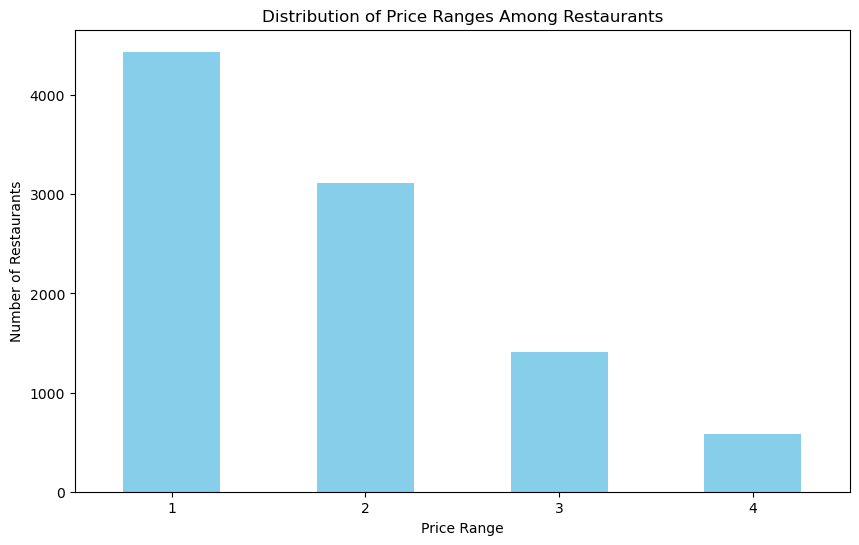

In [14]:
# Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(rotation=0)
plt.show()

In [ ]:
 # Calculate the percentage of restaurants in each price range category.

In [15]:
# Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants in each price range
price_range_percentages = (price_range_counts / total_restaurants) * 100

price_range_percentages


Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: count, dtype: float64

In [ ]:
LEVEL 1 : TASK 4
 # Task:Online Delivery

In [ ]:
# Determine the percentage of restaurants that offer online delivery.

In [16]:
# Count the number of restaurants that offer online delivery
online_delivery_count = df['Has Online delivery'].str.lower().value_counts().get('yes', 0)

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants that offer online delivery
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

online_delivery_percentage

25.686438901697755

In [ ]:
# Compare the average ratings of restaurants with and without online delivery.


In [29]:
# Filter the dataset for restaurants with online delivery
online_delivery_restaurants = df[df['Has Online delivery'] == 'yes']

# Filter the dataset for restaurants without online delivery
no_online_delivery_restaurants = df[df['Has Online delivery'] == 'no']


In [30]:
# Calculate the average rating for restaurants with online delivery
average_rating_online_delivery = online_delivery_restaurants['Aggregate rating'].mean()

# Calculate the average rating for restaurants without online delivery
average_rating_no_online_delivery = no_online_delivery_restaurants['Aggregate rating'].mean()

average_rating_online_delivery, average_rating_no_online_delivery

(3.2488372093023257, 2.4635171343957127)